In [3]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [4]:
data_raw=pd.read_csv("./data/Train.csv")
meta=pd.read_csv("./data/airqo_metadata.csv")

In [5]:
from files.preprocessing import preprocessing

In [6]:
data = preprocessing(data_raw, use_location=False, only_means=False)

/Users/denniseickhorn/neuefische/ML-Project-1/files/preprocessing.py:48: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(features,1,inplace=True)


In [7]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
#param_grid = {'criterion': ['gini', 'entropy'],
#                'max_depth': [None] + list(np.linspace(2,32,10).astype(int)),
#                'min_samples_split': np.linspace(2,22,10).astype(int),
#                'min_samples_leaf': np.linspace(2,22,10).astype(int)
#}
#param_grid = {'depth': [4,5,6,7,8,9, 10],
#                'learning_rate': [0.01,0.02,0.03,0.04],
#                'iterations': [10, 20,30,40,50,60,70,80,90, 100]
#                 }
param_grid = {
    'n_estimators': [50,100,200,300,400,500],
    'max_depth': [40,50,60],
    'max_features': ['sqrt','log2']
}


gs = GridSearchCV(ExtraTreesRegressor(random_state=42), verbose=2, param_grid=param_grid, cv=5, n_jobs=-1)
#gs.fit(X_train, y_train)
#gs.best_params_

In [9]:
#reg = LinearRegression()
#reg = DecisionTreeRegressor()
#reg = RandomForestRegressor()
reg = ExtraTreesRegressor(n_estimators=400, max_depth=50, max_features= 'log2', random_state=42)
#reg = gs.best_estimator_
#reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
print(mean_squared_error(y_test, y_pred_reg, squared=False))
y_pred_reg_train = reg.predict(X_train)
print(mean_squared_error(y_train, y_pred_reg_train, squared=False))

24.555889117676173
6.035853589337779


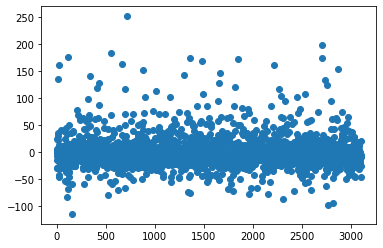

In [10]:
plt.scatter(x=range(len(y_test)),y= y_test-y_pred_reg)

In [11]:
y_pred_C = (y_pred_reg>56).astype(int)
y_test_C = (y_test>56).astype(int)
print(confusion_matrix(y_test_C, y_pred_C))
print(accuracy_score(y_test_C, y_pred_C))
print('recall: ', recall_score(y_test_C, y_pred_C))
print('precision: ', precision_score(y_test_C, y_pred_C))

[[1622  362]
 [ 146  978]]
0.8365508365508365
recall:  0.8701067615658363
precision:  0.7298507462686568


<AxesSubplot:>

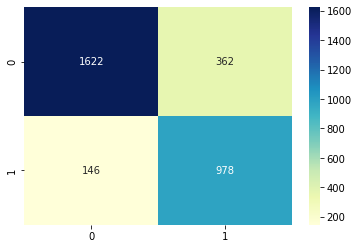

In [12]:
sns.heatmap(confusion_matrix(y_test_C, y_pred_C), annot=True, fmt='d', cmap="YlGnBu")

In [13]:
sorted(np.array([X_train.columns, reg.feature_importances_]).T, key= lambda t: t[1])

[array(['min_precip', 0.0], dtype=object),
 array(['median_precip', 0.0], dtype=object),
 array(['last_precip', 0.008356736463400133], dtype=object),
 array(['min_wind_dir', 0.011365400559894767], dtype=object),
 array(['max_wind_dir', 0.011846711452602028], dtype=object),
 array(['max_temp', 0.012011500279155329], dtype=object),
 array(['min_rel_humidity', 0.012048556483581075], dtype=object),
 array(['ptp_precip', 0.012257574821332643], dtype=object),
 array(['max_precip', 0.012364289180464314], dtype=object),
 array(['ptp_temp', 0.012431579048914294], dtype=object),
 array(['ptp_wind_dir', 0.01270228640655014], dtype=object),
 array(['ptp_rel_humidity', 0.012761701136975476], dtype=object),
 array(['min_wind_spd', 0.013508629953470798], dtype=object),
 array(['ptp_atmos_press', 0.013897865414892914], dtype=object),
 array(['max_rel_humidity', 0.014949799626754544], dtype=object),
 array(['mean_last_day_precip', 0.015007290873426008], dtype=object),
 array(['min_temp', 0.016758026674